# **AP155 Lab Assignment**
## Module 3: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


**Notebook Key**

Author: Gene Carlo F. Belinario

### PROBLEM 1
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) \sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(15 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(15 pts)*


In [137]:
import numpy as np
from numpy import zeros
from cmath import exp, pi, sin

N = 2000 # number of samples
y = [sin(pi*n/N)*sin(20*pi*n/N) for n in range(N)] # samples

# user defined function to calculate the coefficients of the discrete Fourier transform
def dft(y):
    N = len(y)
    c = zeros(N//2 + 1, complex)
    for k in range(N//2 + 1):
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c

ck = dft(y)


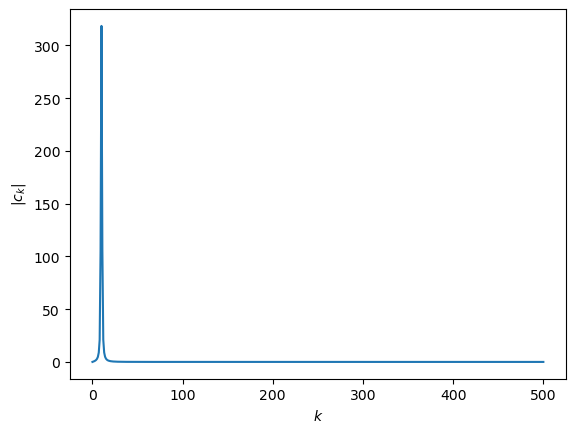

In [129]:
import matplotlib.pyplot as plt

maxf = max(np.abs(ck))

plt.plot(range(N//2 + 1), np.abs(ck))
plt.xlabel(r"$k$")
plt.ylabel(r"$|c_k|$")
#plt.axhline(maxf, label=f"{maxf}")
#plt.legend()
plt.show()

### PROBLEM 2

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the Course Pack > Datasets folder).

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(10 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(20 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(10 pts.)*

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(30 pts.)*

In [146]:
import numpy as np
dow = np.loadtxt("dow.txt")

print(dow[0:10])


[12121.71 12136.44 12226.73 12221.93 12194.13 12283.85 12331.6  12309.25
 12278.41 12307.48]


Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
```

Now you can start to write code for this problem!

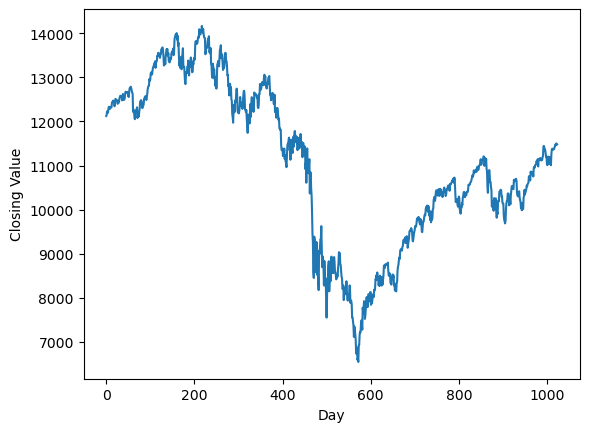

In [147]:
import matplotlib.pyplot as plt

# plot the data
#plt.scatter(range(len(dow)), dow)
plt.plot(range(len(dow)), dow)
plt.xlabel("Day")
plt.ylabel("Closing Value")
plt.show()


In [148]:
# calculate the coefficients of the discrete Fourier transform

ck = np.fft.rfft(dow)

#print(len(ck))
#print(ck)

In [149]:
len(ck)

513

In [ ]:
# retain first 10%
ck10 = np.zeros(len(ck), complex)
for n in range(round(0.10*len(ck10))):
    ck10[n] = ck[n]

ck50 = np.zeros(len(ck), complex)
for n in range(round(0.50*len(ck50))):
    ck50[n] = ck[n]

ck80 = np.zeros(len(ck), complex)
for n in range(round(0.80*len(ck80))):
    ck80[n] = ck[n]

# calculate inverse fourier transform

ck10i = np.fft.irfft(ck10)
ck50i = np.fft.irfft(ck50)
ck80i = np.fft.irfft(ck80)


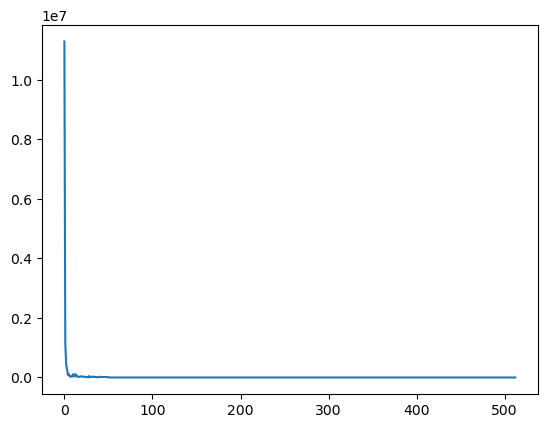

In [131]:
# plot the coefficients
plt.plot(range(len(ck10)), np.abs(ck10))
plt.show()

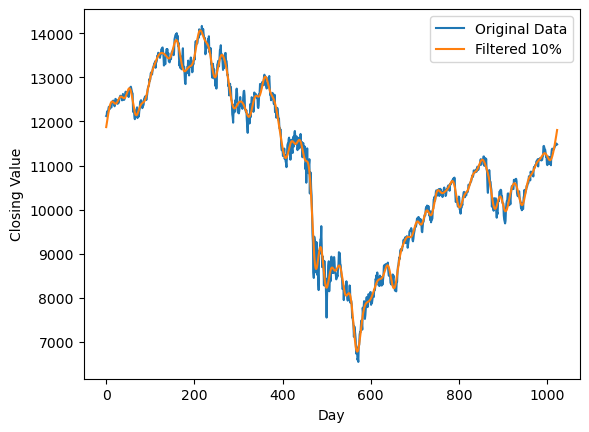

In [ ]:
plt.plot(range(len(dow)), dow, label="Original Data")
plt.plot(range(len(dow)), ck10i, label="Filtered 10%")
#plt.plot(range(len(dow)), ck50i, label="Filtered 50%")
#plt.plot(range(len(dow)), ck80i, label="Filtered 80%")
plt.xlabel("Day")
plt.ylabel("Closing Value")
plt.legend()
plt.show()